## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(combined_mouse_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicate_id

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID']=='g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_id)==False]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create reduced dataframe
tv_table = clean_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']]

#Group by Drug Regimen
tv_df = tv_table.groupby(['Drug Regimen'])

#Calculations for summary statistics table
tv_mean = tv_df['Tumor Volume (mm3)'].mean()
tv_median = tv_df['Tumor Volume (mm3)'].median()
tv_variance = tv_df['Tumor Volume (mm3)'].var()
tv_std = tv_df['Tumor Volume (mm3)'].std()
tv_sem = tv_df['Tumor Volume (mm3)'].sem()

#Group calculations into dataframe and format
tv_summary = pd.DataFrame({'Mean': tv_mean, "Median": tv_median, "Variance": tv_variance, "STD": tv_std, "SEM": tv_sem})
tv_summary = tv_summary.round(2)
tv_summary
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_agg = tv_table.groupby(['Drug Regimen'])
tv_agg_summary = tv_agg.agg(["mean", "median", "var", "std", "sem"])
tv_agg_summary = tv_agg_summary.round(2)
tv_agg_summary
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar Plots

Text(0, 0.5, 'Time Points reached by Mice')

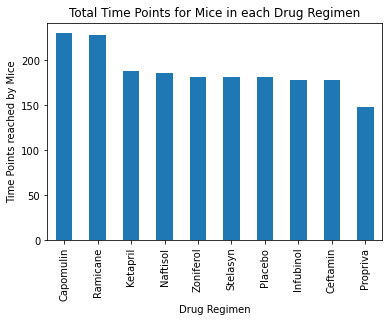

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Create new dataframe with necessary columns
drug_timepoints = clean_mouse_data[["Drug Regimen", "Timepoint"]]

#Group by Drug Regimen
timepoints_group = drug_timepoints.groupby("Drug Regimen")

#Calculate data points per Drug Regimen
timepoints_count = timepoints_group["Timepoint"].count()

#Sort values and graph
timepoints_count.sort_values(ascending=False, inplace=True)
timepoints_count.plot.bar()
plt.title("Total Time Points for Mice in each Drug Regimen")
plt.ylabel("Time Points reached by Mice")

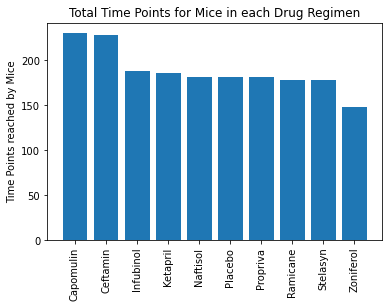

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(timepoints_count))
plt.xticks(rotation="vertical")
plt.bar(x_axis, timepoints_count, tick_label=list(timepoints_group.groups))
plt.title("Total Time Points for Mice in each Drug Regimen")
plt.ylabel("Time Points reached by Mice")
plt.show()

## Pie Plots

Text(0, 0.5, 'Sex')

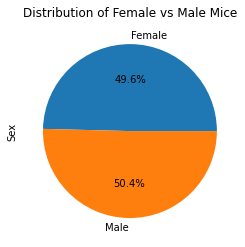

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_reduced = clean_mouse_data[["Mouse ID", "Sex"]]
sex_table = sex_reduced.drop_duplicates(["Mouse ID", "Sex"], keep='first')
sex_group = sex_table.groupby('Sex').count()
sex_chart = sex_group.plot.pie(subplots=True, autopct="%1.1f%%", legend=None)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

#-------->PLEASE READ<----------
#There were some discrepancies between instructions and results in our class
#Especially in this section concerning pie charts and whether or not to include the duplicated mouse
#The code above does not include the duplicate mouse, but I have added code to do it with the duplicate mouse below
#-------------------------------
#sex_table = mouse_metadata[["Sex", "Mouse ID"]]
#sex_group = sex_table.groupby("Sex").count()
#sex_chart = sex_group.plot.pie(subplots=True, autopct="%1.1f%%", legend=None)
#plt.title("Distribution of Female vs Male Mice")
#plt.ylabel("Sex")

C:\Users\Alex\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Sex')

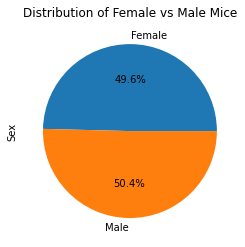

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Female", "Male"
plt.pie(sex_group, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Create a list to loop through and a dictionary to hold data extracted from the loop
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_dict = {}

#Loop through dataframe using list
for drug in drug_list:
    drug_df = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]==drug)]
    #Clean data using drop duplicates
    drug_df.drop_duplicates(subset=['Mouse ID'], keep="last", inplace=True)
    drug_dict[drug] = drug_df["Tumor Volume (mm3)"]
    #Calculate IQR
    lowerq=drug_df["Tumor Volume (mm3)"].quantile(0.25)
    upperq=drug_df["Tumor Volume (mm3)"].quantile(0.75)
    iqr=upperq-lowerq
    min_range = lowerq-(1.5*iqr)
    max_range = upperq+(1.5*iqr)
    #Create list for any potential outliers
    outliers = []
    #Loop through and find outliers using above calculations
    for tv_value in drug_df["Tumor Volume (mm3)"]: 
        if tv_value < min_range or tv_value > max_range:
            outliers.append(round(tv_value,2))
    if outliers:
        print(f"{drug} has an outlier, {outliers}.")
    else:
        print(f"{drug} does not have an outlier.")

Capomulin does not have an outlier.
Ramicane does not have an outlier.
Infubinol has an outlier, [36.32].
Ceftamin does not have an outlier.


C:\Users\Alex\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


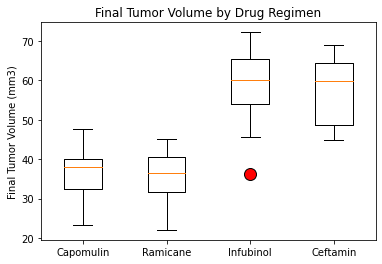

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(drug_dict.values(), flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(np.arange(1,5),drug_dict.keys())
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (Days)')

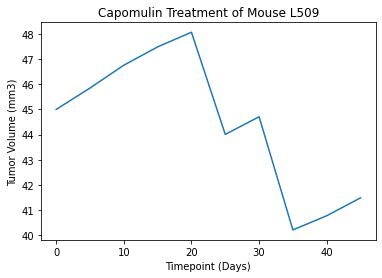

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Select Mouse and create new dataframe
Mouse_L509 = clean_mouse_data.loc[(clean_mouse_data["Mouse ID"]=="l509")]

#Select x and y axis data
L509_timepoints=Mouse_L509["Timepoint"]
L509_tv=Mouse_L509["Tumor Volume (mm3)"]

#Create line chart
plt.plot(L509_timepoints, L509_tv)
plt.title("Capomulin Treatment of Mouse L509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")

Text(0.5, 0, 'Weight (g)')

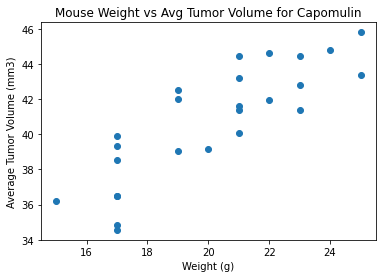

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Create new dataframe for Capomulin
scatter_cap = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]=="Capomulin")]

#Group by mouse
scatter_group = scatter_cap.groupby("Mouse ID")

#Select/Calculate data for x and y axis
scatter_weight = scatter_group["Weight (g)"].unique()
scatter_tv = scatter_group["Tumor Volume (mm3)"].mean()

#Create scatter chart
plt.scatter(scatter_weight, scatter_tv, marker="o")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation between both factors is 0.84, and therefore is strong.
The Linear Regression Equation is y = 0.95x + 21.55.


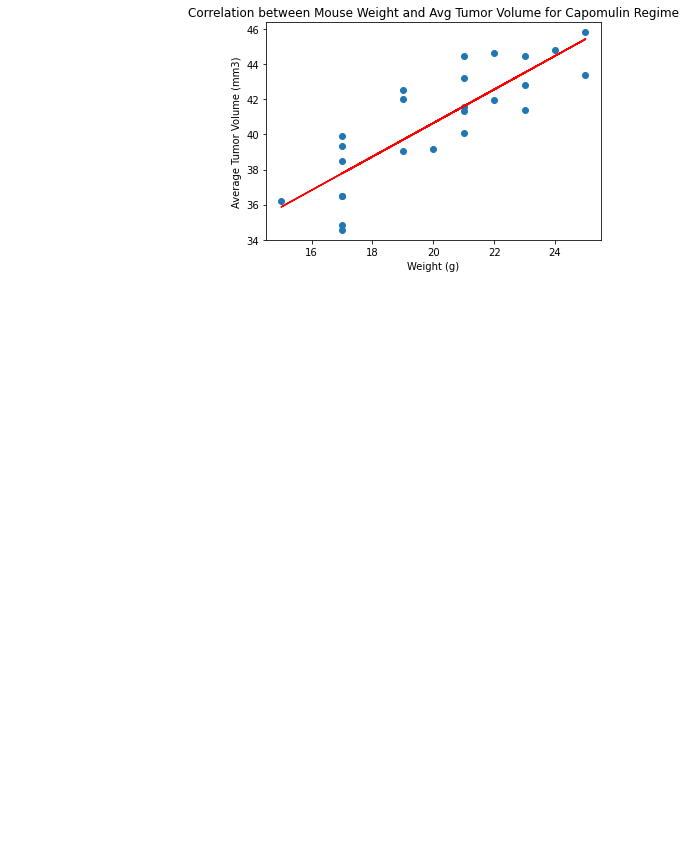

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

#Create new dataframe for using previous scatter plot variables
correlation_group = pd.DataFrame({"Weight": scatter_weight, "Tumor": scatter_tv})

#Format as float
cap_weight_cor = correlation_group["Weight"].astype(float)
cap_tv_cor = correlation_group["Tumor"].astype(float)

#Calculate Pearson Correlation
correlation = round((sts.pearsonr(cap_weight_cor, cap_tv_cor))[0],2)

#Conditionals to determine strength of correlation
if correlation < 0.3:
    strength = "very weak"
elif ((correlation >= 0.3) & (correlation <0.5)):
    strength = "weak"
elif ((correlation >= 0.5) & (correlation < 0.7)):
    strength = "moderate"
elif correlation >= 0.7:
    strength = "strong"

#Print Results
print(f"The correlation between both factors is {correlation}, and therefore is {strength}.")

#Assign x and y values for linear regression calculations and scatter plot
x_values = scatter_weight
y_values = scatter_tv

#Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print results
print(f"The Linear Regression Equation is {line_eq}.")

#Create scatter plot for linear regression

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.title("Correlation between Mouse Weight and Avg Tumor Volume for Capomulin Regime")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()